# Solucionador do Jogo é Bloxorz ou Cuboid
[Link do Jogo](https://bloxorz.io/)

Equipe:\
Antonio Carrilho Neto  - Aluno UATI\
Eduardo Souza Rocha - 11218692\
Fábio Verardino de Oliveira - 12674547\
Olavo Morais Borges Pereira - 11297792


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from queue import SimpleQueue, PriorityQueue

width, height = plt.rcParamsDefault["figure.figsize"]
plt.rcParams["figure.figsize"] = (2 * width, 2 * height) # Set plot size

Definição das Fases

Para definir sobre qual fase o algortimo vai rodar, deve-se definir as variáveis `FASE` e `INICIO`

In [ ]:
# 0: Vazio
# 1: Chão
# 2: Objetivo/Buraco
# 3: Chão Laranja (Não pode ficar com o bloco em pé nessa coordenada, apenas com ele deitado)

FASE0 = [
    [0,0,0,0,0,0,1,1,1],
    [0,0,0,1,1,1,1,2,1],
    [1,1,1,1,1,1,1,1,1],
    [1,1,1,1,1,1,0,0,0],
    [1,1,1,0,0,0,0,0,0]
]
INICIO0 = (3, 1, 'p')

# Passcode 780464
FASE1 = [
  [1,1,1,0,0,0,0,0,0,0],
  [1,1,1,1,1,1,0,0,0,0],
  [1,1,1,1,1,1,1,1,1,0],
  [0,1,1,1,1,1,1,1,1,1],
  [0,0,0,0,0,1,1,2,1,1],
  [0,0,0,0,0,0,1,1,1,0],
]
INICIO1 = (1, 1, 'p')

# Passcode 918660
FASE3 = [
  [0,0,0,0,0,0,1,1,1,1,1,1,1,0,0],
  [1,1,1,1,0,0,1,1,1,0,0,1,1,0,0],
  [1,1,1,1,1,1,1,1,1,0,0,1,1,1,1],
  [1,1,1,1,0,0,0,0,0,0,0,1,1,2,1],
  [1,1,1,1,0,0,0,0,0,0,0,1,1,1,1],
  [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1],
]
INICIO3 = (3, 1, 'p')

# Passcode 520967
FASE4 = [
    [0,0,0,3,3,3,3,3,3,3,0,0,0,0],
    [0,0,0,3,3,3,3,3,3,3,0,0,0,0],
    [1,1,1,1,0,0,0,0,0,1,1,1,0,0],
    [1,1,1,0,0,0,0,0,0,0,1,1,0,0],
    [1,1,1,0,0,0,0,0,0,0,1,1,0,0],
    [1,1,1,0,0,1,1,1,1,3,3,3,3,3],
    [1,1,1,0,0,1,1,1,1,3,3,3,3,3],
    [0,0,0,0,0,1,2,1,0,0,3,3,1,3],
    [0,0,0,0,0,1,1,1,0,0,3,3,3,3],
]
INICIO4 = (5, 1, 'p')


# Passcode 524383
FASE6 = [
  [0,0,0,0,0,1,1,1,1,1,1,0,0,0,0],
  [0,0,0,0,0,1,0,0,1,1,1,0,0,0,0],
  [0,0,0,0,0,1,0,0,1,1,1,1,1,0,0],
  [1,1,1,1,1,1,0,0,0,0,0,1,1,1,1],
  [0,0,0,0,1,1,1,0,0,0,0,1,1,2,1],
  [0,0,0,0,1,1,1,0,0,0,0,0,1,1,1],
  [0,0,0,0,0,0,1,0,0,1,1,0,0,0,0],
  [0,0,0,0,0,0,1,1,1,1,1,0,0,0,0],
  [0,0,0,0,0,0,1,1,1,1,1,0,0,0,0],
  [0,0,0,0,0,0,0,1,1,1,0,0,0,0,0],
]
INICIO6 = (3, 0, 'p')

# Passcode 448106
FASE13 = [
    [1,1,1,3,1,1,1,1,3,1,1,1,1,0],
    [1,1,0,0,0,0,0,0,0,0,1,1,1,0],
    [1,1,0,0,0,0,0,0,0,0,0,1,1,1],
    [1,1,1,0,0,0,1,1,1,0,0,1,1,1],
    [1,1,1,3,3,3,1,2,1,0,0,1,1,1],
    [1,1,1,0,0,3,1,1,1,0,0,1,0,0],
    [0,0,1,0,0,3,3,3,3,3,1,1,0,0],
    [0,0,1,1,1,3,3,1,3,3,3,0,0,0],
    [0,0,0,1,1,3,3,3,3,3,3,0,0,0],
    [0,0,0,1,1,1,0,0,1,1,0,0,0,0],
]
INICIO13 = (3, 12, 'p')

FASE = FASE13
INICIO = INICIO13
FINAL = [] # Vou adicionar os estados finais ao percorrer o grafo

# Pega quais posições são o objetivo
for i in range(len(FASE)):
  for j in range(len(FASE[0])):
    if FASE[i][j] == 2:
      FINAL.append((i, j, 'p'))

# Modelando Espaço de Busca

Organização dos dados

A posição do bloco é definido como uma tupla:
`pos = (i, j, o)`

Em que:
- i: linha
- j: coluna
- o: orientação, podendo ser:
  - 'p': Em pé
  - 'h': horizontal
  - 'v': vertical

___

Um movimento é definido como uma tupla:
`mov = (pos, d)`

Em que ao fazer o movimento para direção `d`, se alcançou a posição `pos`

Em que:
- pos: tupla posição `(i, j, o)`
- d: direção, podendo ser:
  - 'l': esquerda
  - 'r': direita
  - 'd': baixo
  - 'u': cima

In [ ]:
def possiveis_movimentos(pos):
  """
  Retorna todos os movimentos possíveis a partir
  da posição dada
  """
  i, j, o = pos
  if o == 'p':
    return (
      ((i    , j - 2, 'h'), 'l'),
      ((i    , j + 1, 'h'), 'r'),
      ((i - 2, j    , 'v'), 'u'),
      ((i + 1, j    , 'v'), 'd'),
    )
  elif o == 'h':
    return (
      ((i    , j - 1, 'p'), 'l'),
      ((i    , j + 2, 'p'), 'r'),
      ((i - 1, j    , 'h'), 'u'),
      ((i + 1, j    , 'h'), 'd'),
    )
  elif o == 'v':
    return (
      ((i    , j - 1, 'v'), 'l'),
      ((i    , j + 1, 'v'), 'r'),
      ((i - 1, j    , 'p'), 'u'),
      ((i + 2, j    , 'p'), 'd'),
    )

def posicao_eh_valida(pos, fase):
  """
  Retorna se a posição é valida
  """

  def esta_no_mapa(pos, dim):
    i, j, _ = pos
    n, m = dim
    return 0 <= i < n and 0 <= j < m

  i, j, o = pos
  n, m = len(fase), len(fase[0])

  if not esta_no_mapa(pos, (n, m)):
    return False

  if o == 'p':
    if fase[i][j] == 0:
      return False
    if fase[i][j] == 3:
      return False
    return True

  elif o == 'h':
    if not esta_no_mapa((i, j + 1, o), (n, m)):
      return False
    if fase[i][j] == 0 or fase[i][j + 1] == 0:
      return False
    return True

  elif o == 'v':
    if not esta_no_mapa((i + 1, j, o), (n, m)):
      return False
    if fase[i][j] == 0 or fase[i + 1][j] == 0:
      return False
    return True

def movimentos(pos, fase):
  """
  Retorna uma lista de todos os movimentos possíveis
  """
  return [(pos, d) for pos, d in possiveis_movimentos(pos) if posicao_eh_valida(pos, fase)]

(((3, 10, 'h'), 'l'), ((3, 13, 'h'), 'r'), ((1, 12, 'v'), 'u'), ((4, 12, 'v'), 'd'))
[((1, 12, 'v'), 'u')]


Criação do Grafo

Os grafos desenhados exibidos nesse notebook usam as seguintes cores:
- Vermelho: nó inicial
- Verde: nós finais
- Roxo: nós visitados
- Magenta: nós que estavam na fila para ser processados

In [ ]:
def exibir_grafo(G, nxpos, visitados=None):
  node_color = []
  for node in G.nodes():
    if G.nodes[node]['tipo'] == 'inicio':
      node_color.append('red')
    elif G.nodes[node]['tipo'] == 'final':
      node_color.append('green')
    elif visitados and visitados.get(node) == 0:
      node_color.append('magenta')
    elif visitados and visitados.get(node) == 1:
      node_color.append('purple')
    else:
      node_color.append('#1f78b4')

  nx.draw(G, with_labels=True, node_size=750, font_size=7, pos=nxpos, node_color=node_color, font_weight='bold')
  #edge_labels = nx.get_edge_attributes(G, 'mov')
  #nx.draw_networkx_edge_labels(G, pos=nxpos, edge_labels=edge_labels)
  plt.show(True)

In [ ]:
def criar_grafo(fase, posicao):
  """
  Cria um grafo usando a bilioteca NetworkX

  Os Nós são as possíveis posições,
  e possuem o atributo `tipo`
  dizendo se aquele é o nó inicial, final, ou intermediário

  As arestas são as possíveis transições feitas através dos movimentos,
  e possuem o atributo `mov`
  dizendo em qual direção o movimento foi feito
  """

  def jogar(pos, fase, visitados, G):
    """
    A criação do grafo é implementada
    fazendo uma recursão

    Para ficar mais claro, eu criei essa função interna
    com a recursão
    """
    if not posicao_eh_valida(pos, fase):
      return

    if visitados.get(pos):
      return

    visitados[pos] = True
    i, j, o = pos

    if pos in FINAL:
      tipo = 'final'
    else:
      tipo = 'intermediario'
    G.add_node(pos, tipo=tipo) # Armazena o tipo do nó

    for m in movimentos(pos, fase):
      p, d = m
      G.add_edge(pos, p, mov=d) # Armazena o movimento da aresta
      jogar(p, fase, visitados, G)

  # Foi implementado como um digrafo,
  # para salvar nas arestas o movimento
  # que deve ser feito para ir de uma posição a outra
  G = nx.DiGraph()
  visitados = dict()
  jogar(posicao, fase, visitados, G)
  G.add_node(INICIO, tipo='inicio')
  return G


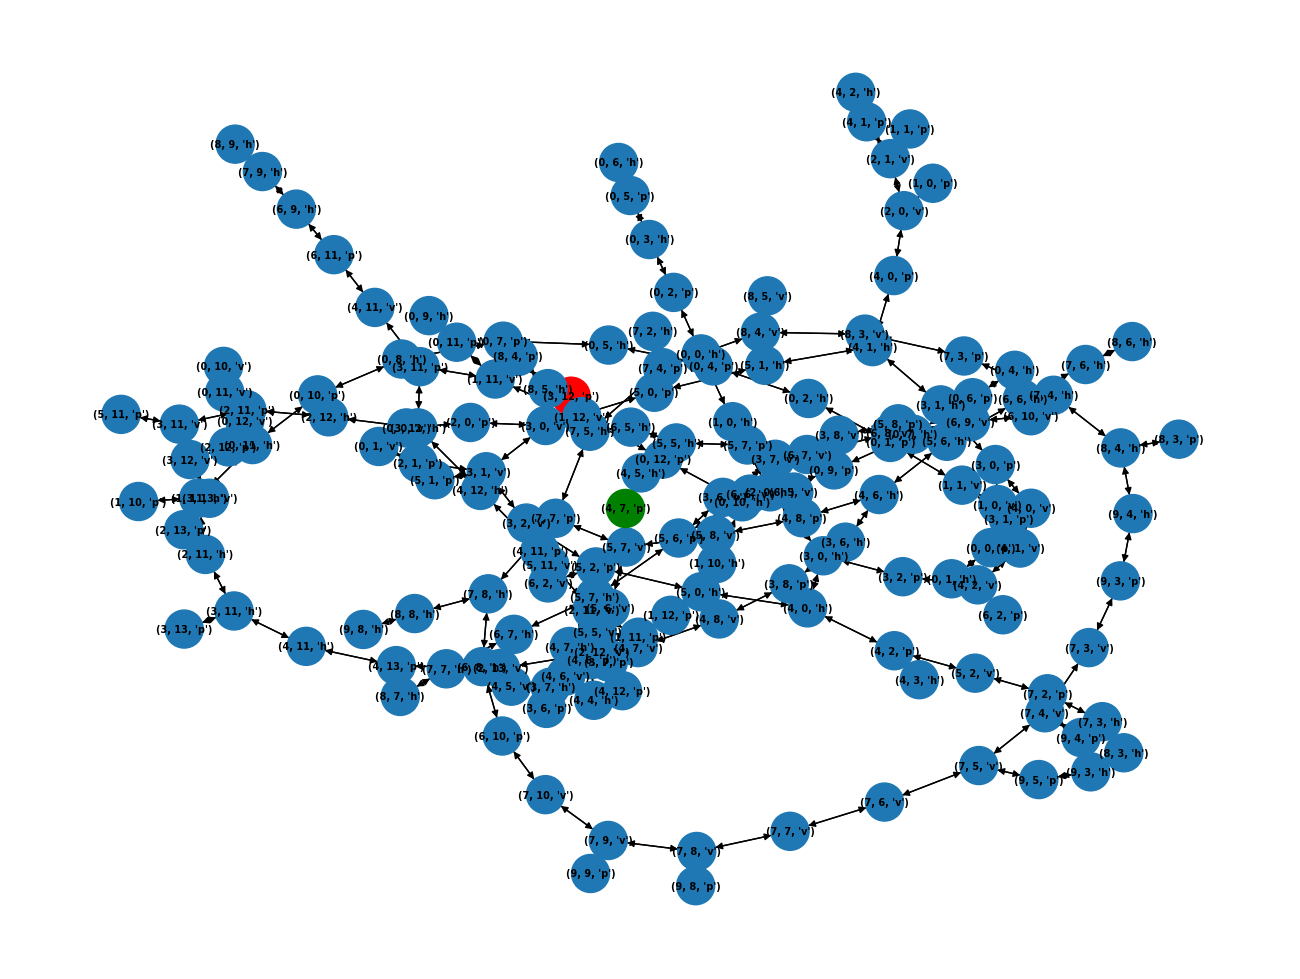

In [ ]:
G = criar_grafo(FASE, INICIO)
nxpos = nx.spring_layout(G)
exibir_grafo(G, nxpos)

# Buscas Não Informadas

O Caminho retornado pelas buscas é um array de tuplas contendo o nó e o movimento feito para chegar até ele

In [ ]:
class Info:
  """
  Criei essa classe auxiliar
  porque inteiros são passador por valor
  """
  def __init__(self):
    self.operacoes = 0

## Busca em Profundidade

In [ ]:
def busca_em_profundidade(G, u, visitados, caminho, info):
  """
  Obs: visitados, caminho e info são passados por referêcia e alterados nessa função
  """
  if visitados.get(u) == 1:
    return False
  info.operacoes += 1

  if G.nodes[u]['tipo'] == 'final':
    return True

  for v in G[u]:
    mov = G[u][v]['mov'] # Pega movimendo da aresta
    caminho.append((v, mov))
    visitados[u] = 1 # Marca nó como visitado
    ok = busca_em_profundidade(G, v, visitados, caminho, info)
    if ok: # Se a busca já encontrou solução, não tem porque continuar a fazer a busca
      return True
    caminho.pop()

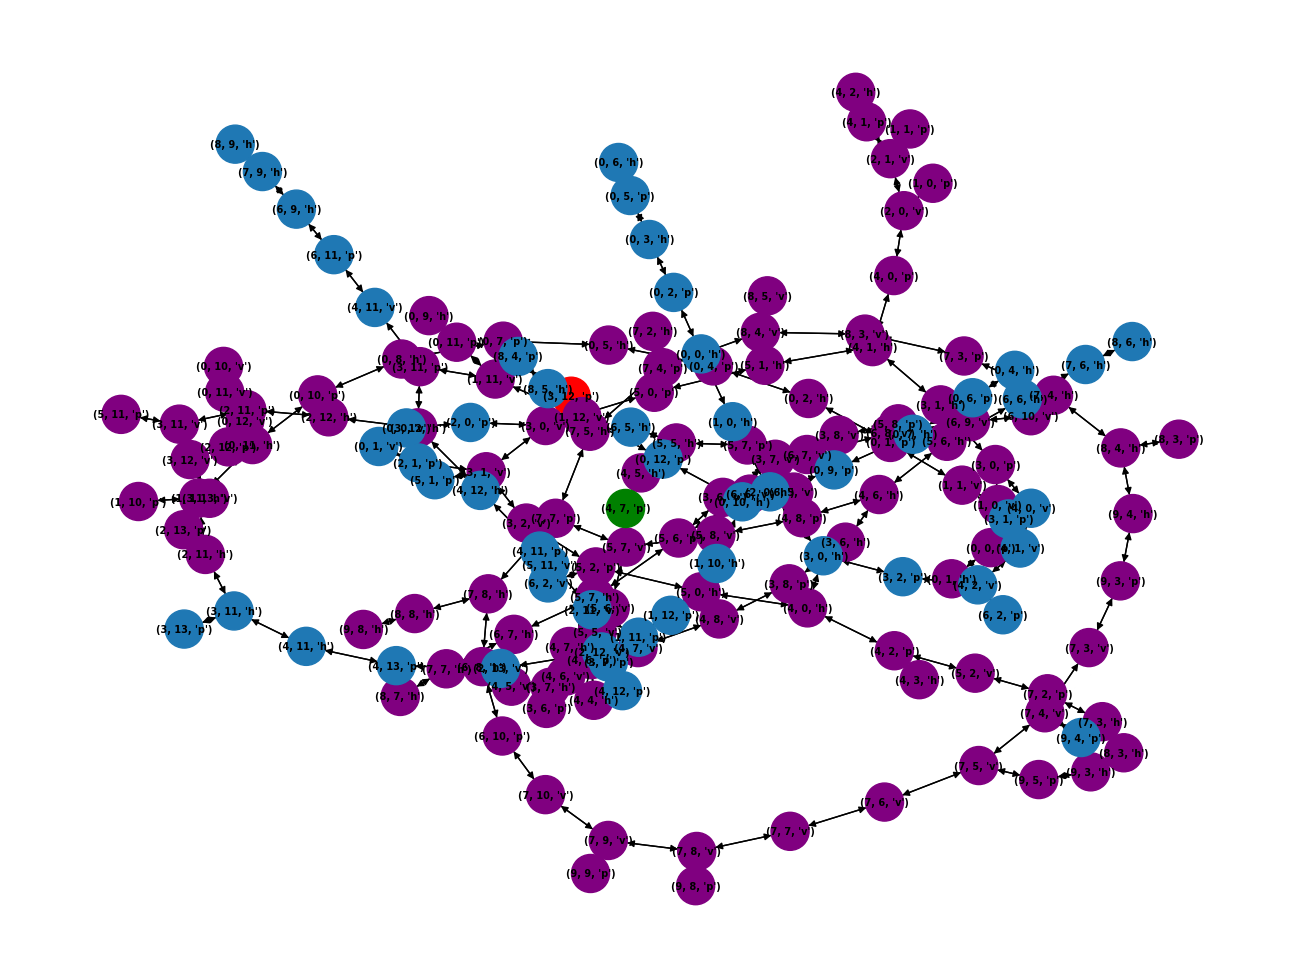

Número de Nós visitados: 124
Tamanho da Solução: 79
Solução: uldrulurddruluullllllldldrddlurrdlurddrddrulldruuldrurruluruldrrulddrullddrulur


In [ ]:
visitados = dict()
caminho = []
info = Info()
busca_em_profundidade(G, INICIO, visitados, caminho, info)

# Separa nós que fazem parte dos caminhos dos movimentos que fazem parte da solução
cam, mov = [], []
for c, m in caminho:
  cam.append(c)
  mov.append(m)

exibir_grafo(G, nxpos, visitados)
print(f"Número de Nós visitados: {info.operacoes}")
print(f"Tamanho da Solução: {len(mov)}")
print("Solução: %s" % ''.join(mov))

## Busca em Largura

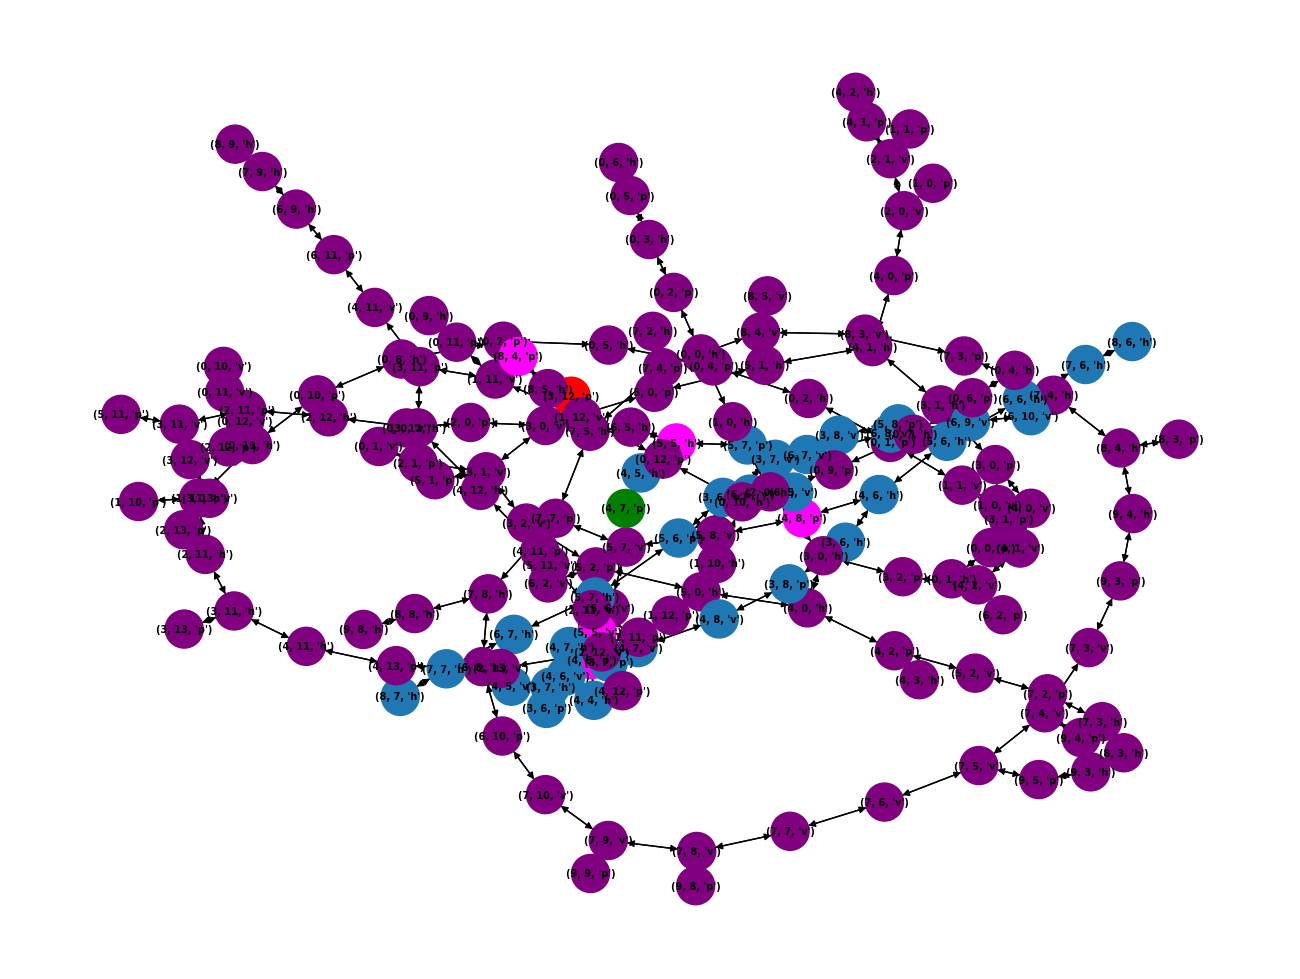

Número de Nós visitados: 139
Tamanho da Solução: 46
Solução: uldruldrruluullllllldddruldrddrddrurrrrruldluu


In [ ]:
def busca_em_largura(G, u, visitados, info):
  queue = SimpleQueue()
  queue.put((u, []))

  while not queue.empty():
    u, cam = queue.get()
    info.operacoes += 1
    visitados[u] = 1
    if G.nodes[u]['tipo'] == 'final':
      return cam

    for v in G[u]:
      if visitados.get(v) == 0 or visitados.get(v) == 1:
        continue
      if visitados.get(v) != 1:
        visitados[v] = 0
      mov = G[u][v]['mov']
      queue.put((v, cam + [(v, mov)]))


In [ ]:
visitados = dict()
operacoes = 0
info = Info()
caminho = busca_em_largura(G, INICIO, visitados, info)

# Separa nós que fazem parte dos caminhos dos movimentos que fazem parte da solução
cam, mov = [], []
for c, m in caminho:
  cam.append(c)
  mov.append(m)

exibir_grafo(G, nxpos, visitados)
print(f"Número de Nós visitados: {info.operacoes}")
print(f"Tamanho da Solução: {len(mov)}")
print("Solução: %s" % ''.join(mov))

## Busca Informada -> A*

In [ ]:
def a_estrela(G, u, visitados, h, info):
  queue = PriorityQueue()
  queue.put((0 + h[u], (u, [])))

  while not queue.empty():
    p, (u, cam) = queue.get()
    info.operacoes += 1
    if G.nodes[u]['tipo'] == 'final':
      return cam

    visitados[u] = 1
    for v in G[u]:
      if visitados.get(v) == 0 or visitados.get(v) == 1:
        continue
      visitados[v] = 0

      mov = G[u][v]['mov']
      # h # Função avaliação
      g = len(cam) # Função custo
      f = g + h[v] # Função heuristica
      queue.put((f, (v, cam + [(v, mov)])))

## Metade da distância Manhatan

Note que na `FASE6` são visitados mais nós que na busca em largura. Isso acontece pois é necessário "manobrar" o bloco antes de seguir, porém como a heurística faz verificar nós mais próximos antes, o algoritmo testa movimentos em que o bloco não pode prosseguir

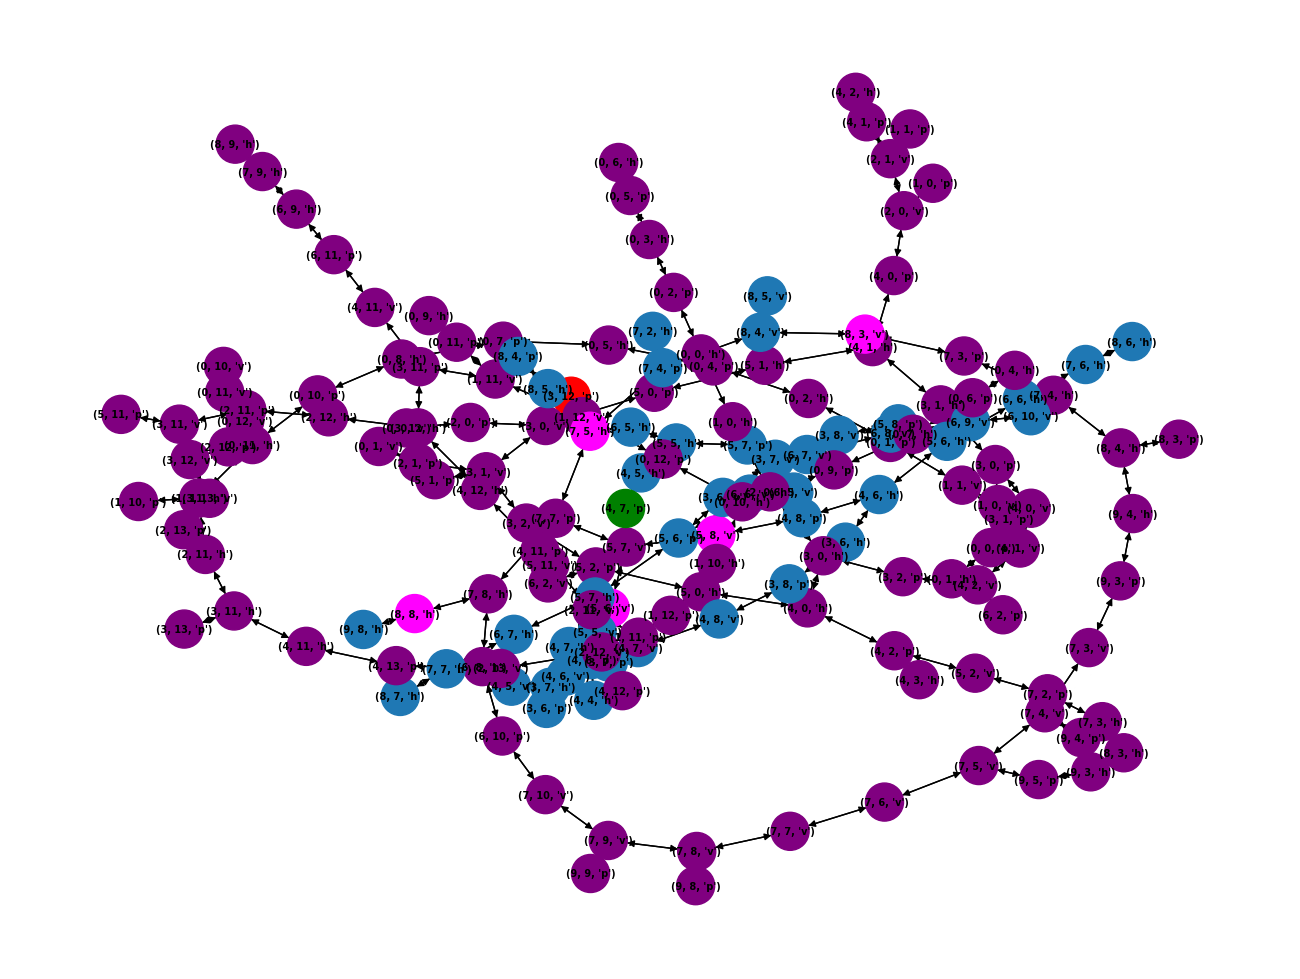

Número de Nós visitados: 127
Tamanho da Solução: 46
Solução: uuldrdrdluuuullllllldddruldrddrddrurrrrruldluu


In [ ]:
h = dict() # Função Avaliação
def distancia_manhatan(u, v):
  ui, uj, _ = u
  vi, vj, _ = v
  return abs(ui - vi) +abs(uj - vj)

for u in G:
  h[u] = min(distancia_manhatan(u, f) / 2 for f in FINAL)


visitados = dict()
operacoes = 0
info = Info()
caminho = a_estrela(G, INICIO, visitados, h, info)

# Separa nós que fazem parte dos caminhos dos movimentos que fazem parte da solução
cam, mov = [], []
for c, m in caminho:
  cam.append(c)
  mov.append(m)

exibir_grafo(G, nxpos, visitados)
print(f"Número de Nós visitados: {info.operacoes}")
print(f"Tamanho da Solução: {len(mov)}")
print("Solução: %s" % ''.join(mov))

## Distância Manhatan

Essa heurísitca leva em conta se o bloco está em pé ou deitado para calcular a
distância Manhattan. Isso é feito para evitar dividir a distância calculada por 2

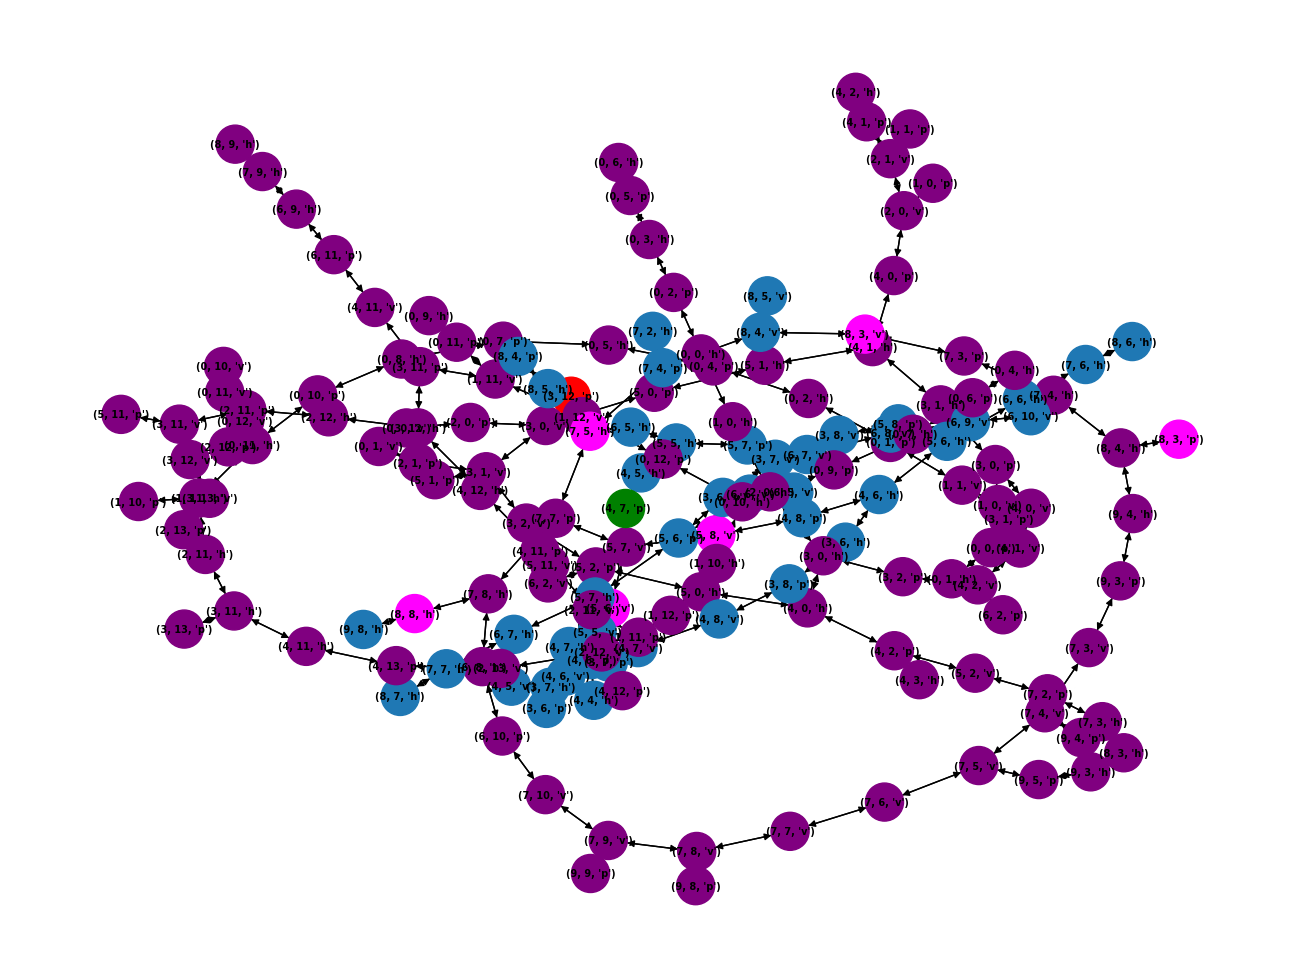

Número de Nós visitados: 126
Tamanho da Solução: 46
Solução: uuldrdrdluuuullllllldddruldrddrddrurrrrruldluu


In [ ]:
h = dict() # Função Avaliação
def distancia_manhatan(u, v):
  ui, uj, up = u
  vi, vj, _ = v
  uaux=0
  vaux=0

  if(vi<ui):
    vi=vi*-1
    ui=ui*-1

  if up=='v':
    uaux=abs(ui-vi)
  else:
    if up=='p':
      aux=1
    else:
      aux=2

    while ui+aux<=vi:
      uaux+=1;
      ui=ui+aux
      if(aux==1):
        aux=2
      else:
        aux=1

  if(vj<uj):
    vj=vj*-1
    uj=uj*-1

  if up=='h':
    vaux=abs(uj-vj)
  else:
    if up=='p':
      aux=2
    else:
      aux=1

    while uj+aux<=vj:
      vaux+=1;
      uj=uj+aux
      if(aux==1):
        aux=2
      else:
        aux=1

  return uaux+vaux

for u in G:
  h[u] = min(distancia_manhatan(u, f) for f in FINAL)


visitados = dict()
operacoes = 0
info = Info()
caminho = a_estrela(G, INICIO, visitados, h, info)

# Separa nós que fazem parte dos caminhos dos movimentos que fazem parte da solução
cam, mov = [], []
for c, m in caminho:
  cam.append(c)
  mov.append(m)

exibir_grafo(G, nxpos, visitados)
print(f"Número de Nós visitados: {info.operacoes}")
print(f"Tamanho da Solução: {len(mov)}")
print("Solução: %s" % ''.join(mov))

## Metade da distância euclidiana

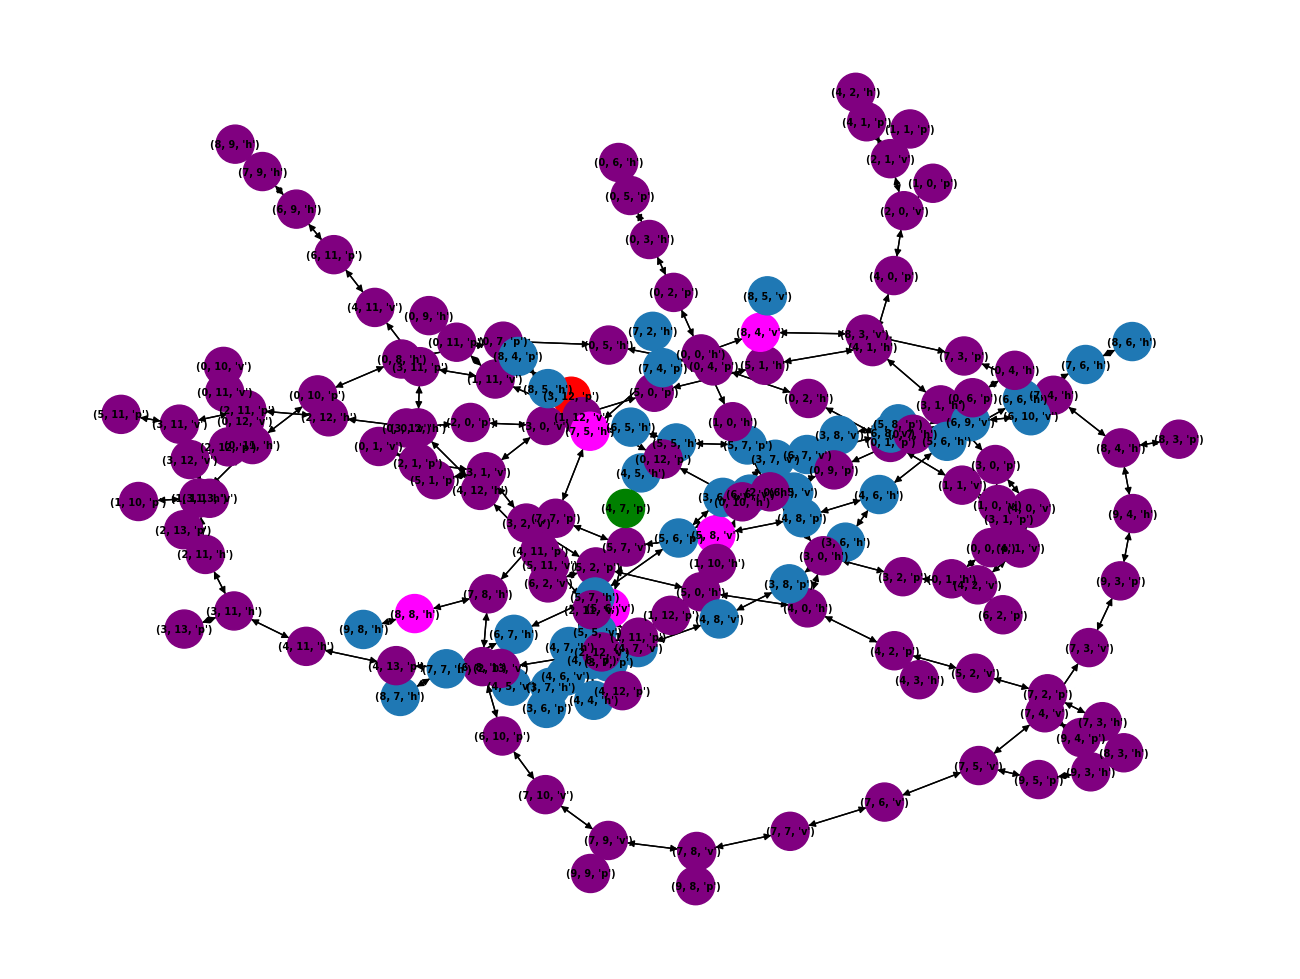

Número de Nós visitados: 128
Tamanho da Solução: 46
Solução: uuldrdrdluuuullllllldddruldrddrddrurrrrruldluu


In [ ]:
h = dict() # Função Avaliação
def distancia_euclidiana(u, v):
  ui, uj, _ = u
  vi, vj, _ = v
  return ((ui - vi) ** 2 + (uj - vj) ** 2) ** (1/2)

for u in G:
  h[u] = min(distancia_euclidiana(u, f) / 2 for f in FINAL)

visitados = dict()
operacoes = 0
info = Info()
caminho = a_estrela(G, INICIO, visitados, h, info)

# Separa nós que fazem parte dos caminhos dos movimentos que fazem parte da solução
cam, mov = [], []
for c, m in caminho:
  cam.append(c)
  mov.append(m)


exibir_grafo(G, nxpos, visitados)
print(f"Número de Nós visitados: {info.operacoes}")
print(f"Tamanho da Solução: {len(mov)}")
print("Solução: %s" % ''.join(mov))

## Heuristica Trivial

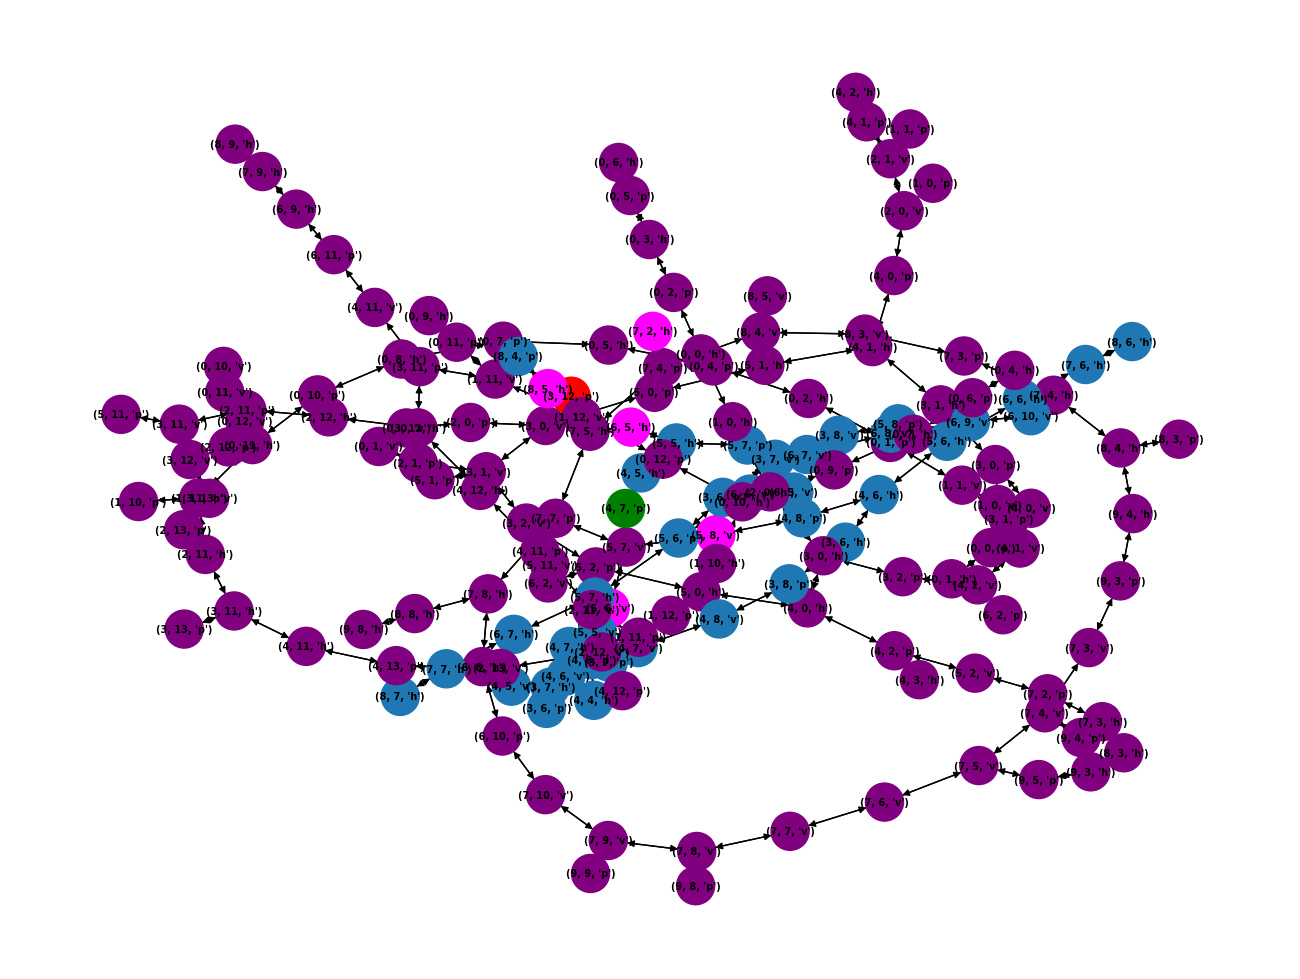

Número de Nós visitados: 134
Tamanho da Solução: 46
Solução: uldruldrruluullllllldddruldrddrddrurrrrruldluu


In [ ]:
h = dict() # Função de Avaliação
for u in G:
  h[u] = 0

visitados = dict()
operacoes = 0
info = Info()
caminho = a_estrela(G, INICIO, visitados, h, info)

# Separa nós que fazem parte dos caminhos dos movimentos que fazem parte da solução
cam, mov = [], []
for c, m in caminho:
  cam.append(c)
  mov.append(m)

exibir_grafo(G, nxpos, visitados)
print(f"Número de Nós visitados: {info.operacoes}")
print(f"Tamanho da Solução: {len(mov)}")
print("Solução: %s" % ''.join(mov))